### Import Libraries and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12

# Create a directory for visualizations
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')

### Load the Dataset

In [2]:
# Load the dataset
# Note: The original file had an issue with the 'has_warranty' column, so it's loaded as string first.
df = pd.read_csv('cleaned_car_dataset.csv')

# Drop the has_warranty column as it is mostly empty and not useful
if 'has_warranty' in df.columns:
    df = df.drop('has_warranty', axis=1)

print("Dataset Loaded. Shape:", df.shape)
df.head()

Dataset Loaded. Shape: (840, 13)


,name,colour,fuel,is_private_use,is_commercial_use,brand,price,transmission_type,drivetrain,make_year,mileage_kmpl,engine_cc,kilometer_run
0,Hyundai | i20 Active S | TDi | 2015 | Hatchback,brown,Petrol,1,0,Hyundai,2475000,Manual,2WD,2015,14.0,1400.0,42000
1,Excellent car on sale,blue,Petrol,0,0,Hyundai,750000,Automatic,2WD,2005,11.0,1399.0,87412
2,TATA 407 Container,white,Diesel,0,0,Tata,700000,Manual,2WD,2013,15.0,2956.0,60000
3,4x4 swaraj Mazda,Unknown,Diesel,0,0,Mahindra,600000,Manual,4WD,2017,15.0,1200.0,50000
4,i20 Active good for used few time,white,Petrol,0,0,Hyundai,375,Automatic,2WD,2019,17.0,1200.0,2400


## 1. Data Cleaning and Preprocessing



### Initial Data Inspection

In [3]:
# Get a summary of the dataset
print("Data Info:")
df.info()

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               840 non-null    object 
 1   colour             840 non-null    object 
 2   fuel               840 non-null    object 
 3   is_private_use     840 non-null    int64  
 4   is_commercial_use  840 non-null    int64  
 5   brand              840 non-null    object 
 6   price              840 non-null    int64  
 7   transmission_type  840 non-null    object 
 8   drivetrain         840 non-null    object 
 9   make_year          840 non-null    int64  
 10  mileage_kmpl       840 non-null    float64
 11  engine_cc          840 non-null    float64
 12  kilometer_run      840 non-null    int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 85.4+ KB

Missing Values per Column:


name                 0
colour               0
fuel                 0
is_private_use       0
is_commercial_use    0
brand                0
price                0
transmission_type    0
drivetrain           0
make_year            0
mileage_kmpl         0
engine_cc            0
kilometer_run        0
dtype: int64


The info() output shows that most columns are objects (strings), but price, make_year, mileage_kmpl, engine_cc, and kilometer_run should be numeric. There are also no immediately obvious missing values from isnull(), but we might find 'Unknown' or other placeholders.

### Check for Duplicates

In [4]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows found: {duplicates}")

# Remove duplicates
df.drop_duplicates(inplace=True)
print(f"Shape after removing duplicates: {df.shape}")

Number of duplicate rows found: 1
Shape after removing duplicates: (839, 13)


### Convert Columns to Correct Data Types

In [5]:
# Define columns to convert to numeric
numeric_cols = ['price', 'make_year', 'mileage_kmpl', 'engine_cc', 'kilometer_run']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows where conversion to numeric failed (resulted in NaT/NaN)
df.dropna(subset=numeric_cols, inplace=True)

# Convert integer-like columns to int
df['make_year'] = df['make_year'].astype(int)
df['kilometer_run'] = df['kilometer_run'].astype(int)
df['price'] = df['price'].astype(int)

print("Data types after conversion:")
df.info()

Data types after conversion:
<class 'pandas.core.frame.DataFrame'>
Index: 839 entries, 0 to 839
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               839 non-null    object 
 1   colour             839 non-null    object 
 2   fuel               839 non-null    object 
 3   is_private_use     839 non-null    int64  
 4   is_commercial_use  839 non-null    int64  
 5   brand              839 non-null    object 
 6   price              839 non-null    int64  
 7   transmission_type  839 non-null    object 
 8   drivetrain         839 non-null    object 
 9   make_year          839 non-null    int64  
 10  mileage_kmpl       839 non-null    float64
 11  engine_cc          839 non-null    float64
 12  kilometer_run      839 non-null    int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 91.8+ KB


### Handling Outliers and Inconsistencies

In [6]:
df.describe()

,is_private_use,is_commercial_use,price,make_year,mileage_kmpl,engine_cc,kilometer_run
count,839.000000,839.000000,8.390000e+02,839.000000,839.000000,839.000000,839.000000
mean,0.128725,0.127533,2.341742e+06,2004.048868,219.756305,1484.543504,51255.171633
std,0.335095,0.333768,2.182427e+06,135.317443,2996.907776,824.891865,29822.600203
min,0.000000,0.000000,3.750000e+02,0.000000,5.000000,100.000000,123.000000
25%,0.000000,0.000000,1.180000e+06,2010.000000,14.000000,1200.000000,38000.000000
50%,0.000000,0.000000,1.775000e+06,2014.000000,15.000000,1200.000000,50000.000000
75%,0.000000,0.000000,2.672500e+06,2017.000000,15.000000,1596.000000,61000.000000
max,1.000000,1.000000,2.400000e+07,2023.000000,69000.000000,15000.000000,485780.000000


Observations from describe():

price: The minimum price is very low (375), which seems like a data entry error. The max is high but plausible for luxury vehicles.

make_year: The minimum year is 0, which is invalid.

mileage_kmpl: The maximum value (69000) is impossible for km/L and is likely a typo for kilometer_run.

engine_cc: The max value (15000) is unrealistic for a car.

### Cleaning Outliers and Errors

In [7]:
# Correcting unrealistic price
# A price of 375 for a 2019 Hyundai is likely missing zeros. Let's assume it's 3,750,000.
df.loc[df['price'] < 100000, 'price'] = df.loc[df['price'] < 100000, 'price'] * 10000

# Removing invalid make_year
df = df[df['make_year'] > 1970]

# Capping unrealistic mileage_kmpl. Anything over 100 km/L is highly suspect for non-electric cars. Let's cap at 100.
df = df[df['mileage_kmpl'] <= 100]

# Capping unrealistic engine_cc. A reasonable max might be 8000cc for high-end cars.
df = df[df['engine_cc'] < 8000]

print("Shape after cleaning outliers:", df.shape)
df.describe()

Shape after cleaning outliers: (806, 13)


,is_private_use,is_commercial_use,price,make_year,mileage_kmpl,engine_cc,kilometer_run
count,806.000000,806.000000,8.060000e+02,806.000000,806.000000,806.000000,806.000000
mean,0.130273,0.126551,2.334345e+06,2013.341191,14.920025,1465.449132,51498.993797
std,0.336812,0.332676,2.192564e+06,5.730075,3.366760,613.847821,29826.463307
min,0.000000,0.000000,1.500000e+05,1975.000000,5.000000,250.000000,123.000000
25%,0.000000,0.000000,1.175000e+06,2010.000000,14.000000,1200.000000,38075.000000
50%,0.000000,0.000000,1.775000e+06,2014.000000,15.000000,1200.000000,50000.000000
75%,0.000000,0.000000,2.650000e+06,2017.000000,15.000000,1596.000000,61000.000000
max,1.000000,1.000000,2.400000e+07,2023.000000,70.000000,5883.000000,485780.000000


## 2. Exploratory Data Analysis & Visualization

Now that the data is clean, we can start exploring it with visualizations.

### Distribution of Price

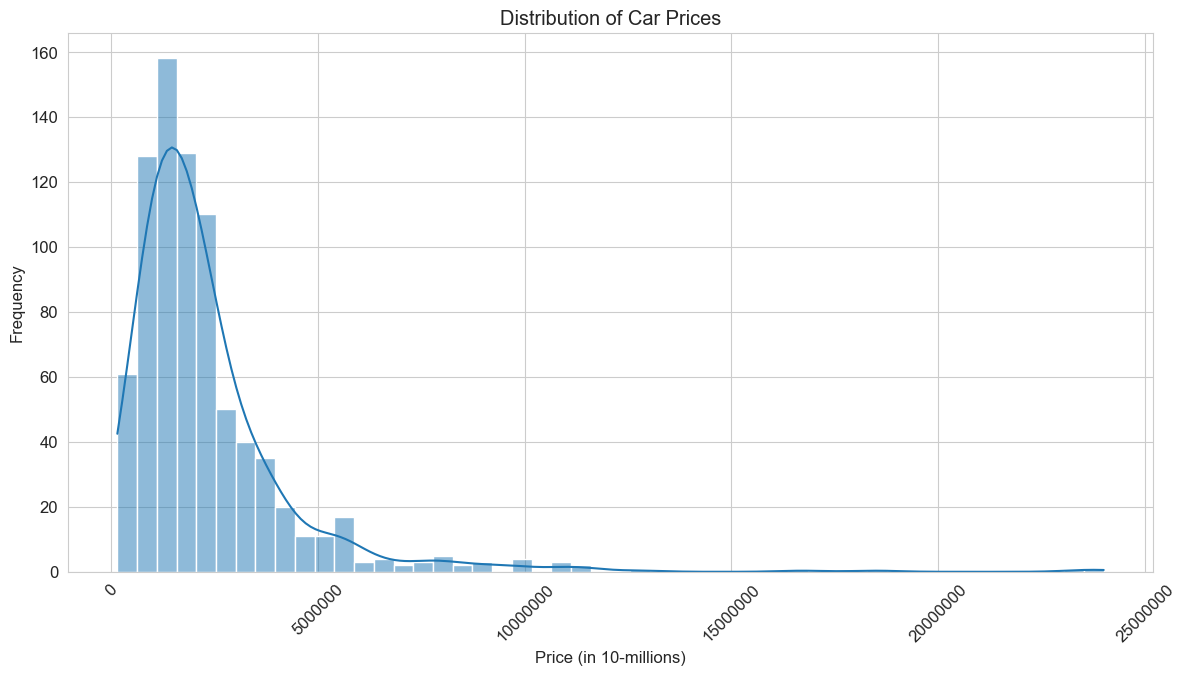

In [8]:
plt.figure(figsize=(14, 7))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in 10-millions)')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)
plt.savefig('visualizations/price_distribution.png')
plt.show()

The price is right-skewed, meaning most cars are in the lower price range, with a few expensive cars creating a long tail.


### Distribution of Brands

C:\Users\DELL\AppData\Local\Temp\ipykernel_2164\2183002490.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')


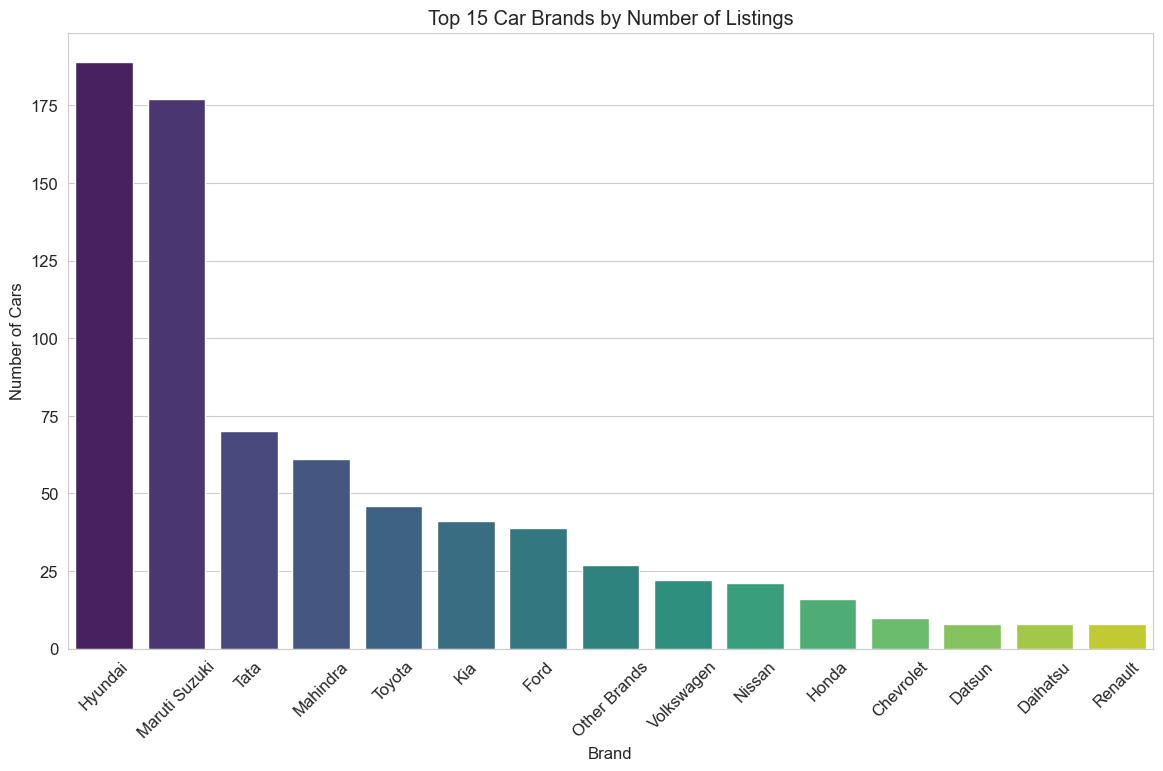

In [9]:
plt.figure(figsize=(14, 8))
brand_counts = df['brand'].value_counts().nlargest(15)
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')
plt.title('Top 15 Car Brands by Number of Listings')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.savefig('visualizations/brand_distribution.png')
plt.show()

Maruti Suzuki and Hyundai dominate the used car market in this dataset, followed by Tata and Mahindra.

### Distribution of Fuel Type

C:\Users\DELL\AppData\Local\Temp\ipykernel_2164\2250328756.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['fuel'], order=df['fuel'].value_counts().index, palette='plasma')


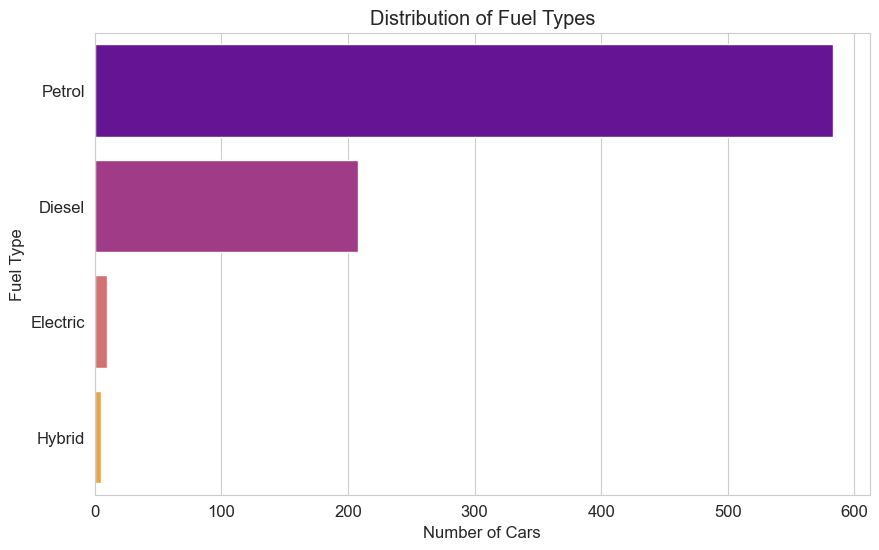

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['fuel'], order=df['fuel'].value_counts().index, palette='plasma')
plt.title('Distribution of Fuel Types')
plt.xlabel('Number of Cars')
plt.ylabel('Fuel Type')
plt.savefig('visualizations/fuel_type_distribution.png')
plt.show()

Petrol is the most common fuel type, followed by Diesel. Electric and Hybrid cars are still a small portion of the market.


## Bivariate Analysis (Analyzing Relationships Between Two Variables)

### Price vs. Make Year

C:\Users\DELL\AppData\Local\Temp\ipykernel_2164\343734425.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='make_year', y='price', data=df, marker='o', ci=None)


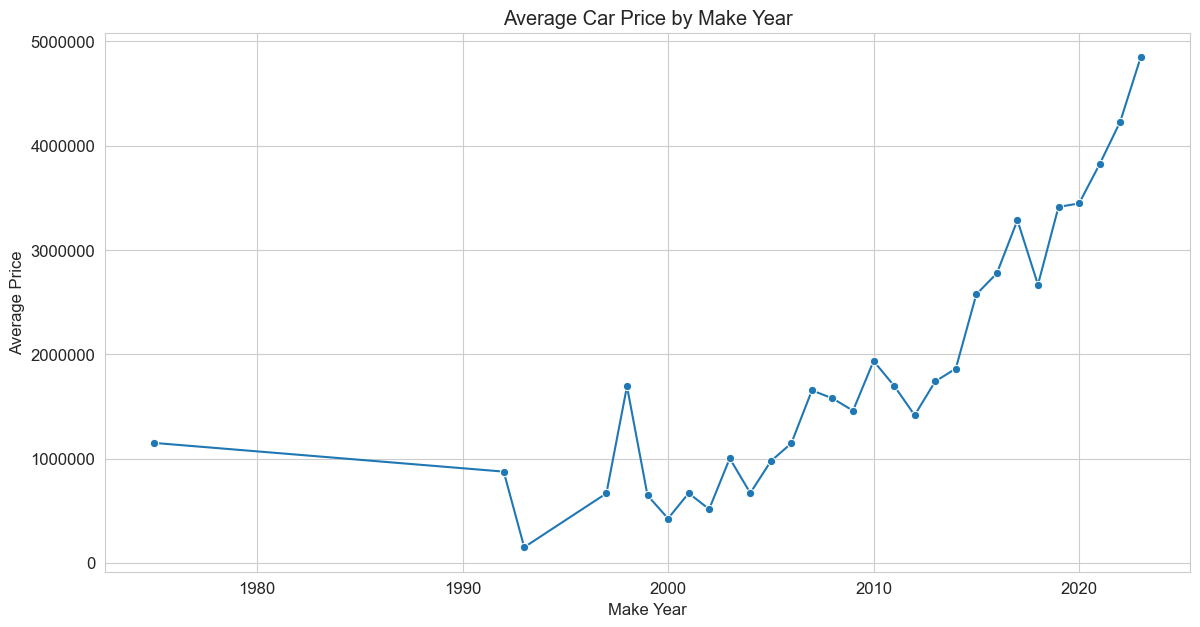

In [11]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='make_year', y='price', data=df, marker='o', ci=None)
plt.title('Average Car Price by Make Year')
plt.xlabel('Make Year')
plt.ylabel('Average Price')
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('visualizations/year_vs_price.png')
plt.show()

As expected, newer cars have a higher average price. There is a clear upward trend.

### Price vs. Kilometers Run

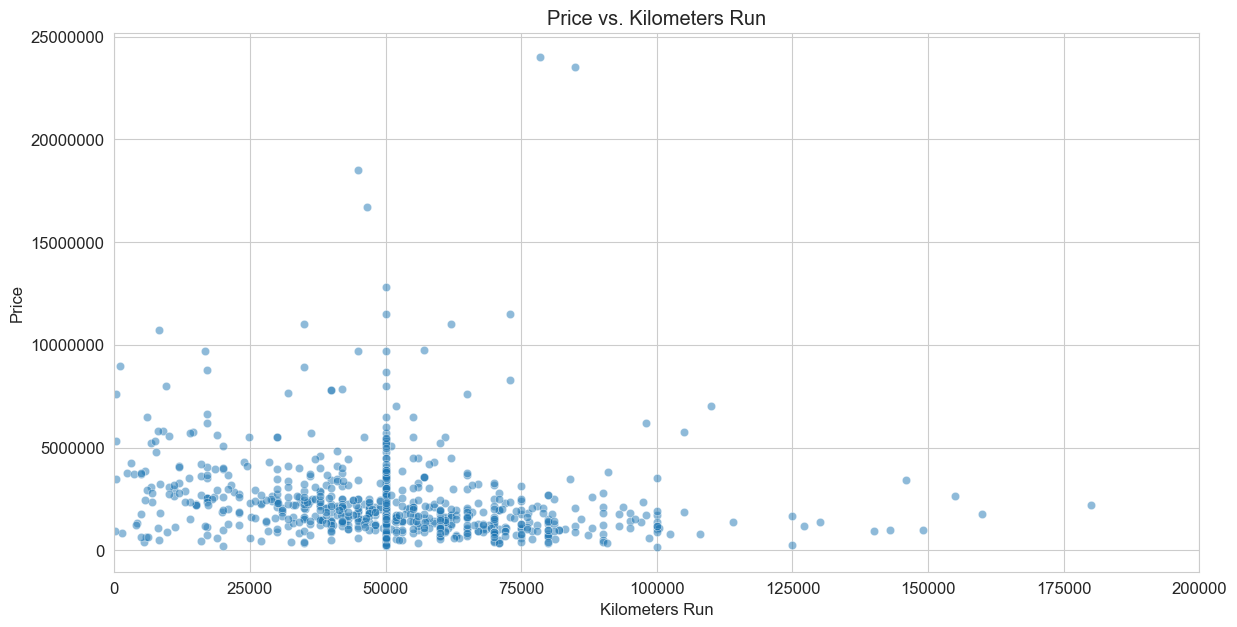

In [12]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='kilometer_run', y='price', data=df, alpha=0.5)
plt.title('Price vs. Kilometers Run')
plt.xlabel('Kilometers Run')
plt.ylabel('Price')
plt.ticklabel_format(style='plain', axis='both')
plt.xlim(0, 200000) # Limiting for better visualization
plt.savefig('visualizations/km_vs_price.png')
plt.show()

There is a clear negative correlation: as the kilometers run increase, the price of the car tends to decrease.


### Price by Fuel Type

C:\Users\DELL\AppData\Local\Temp\ipykernel_2164\3452329518.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fuel', y='price', data=df, palette='cubehelix')


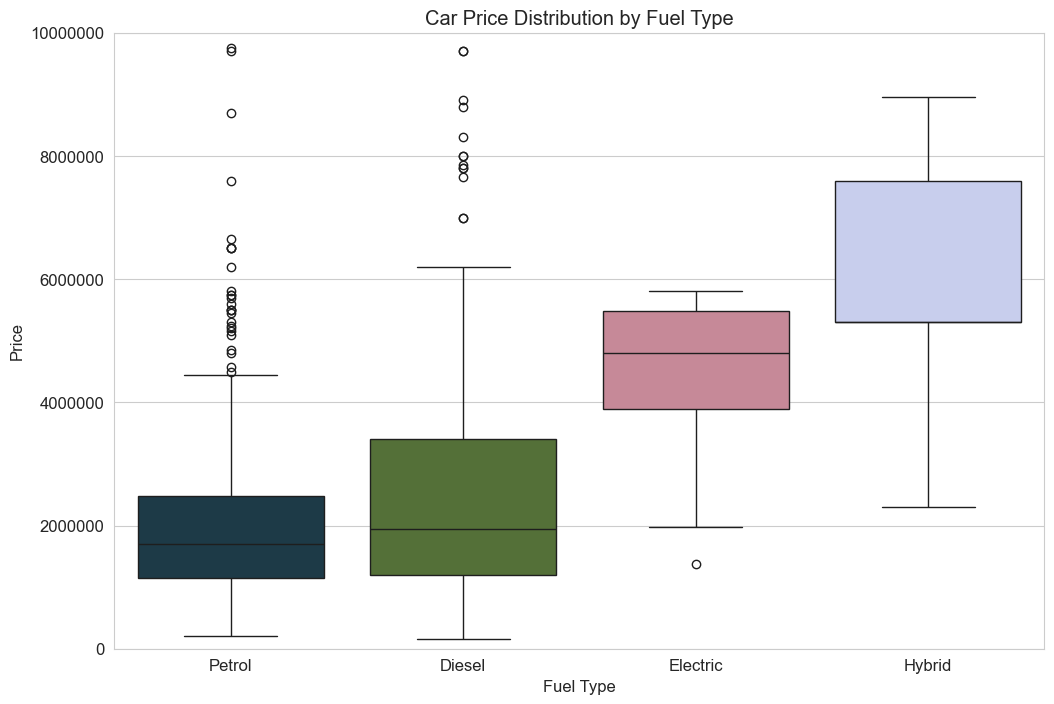

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='fuel', y='price', data=df, palette='cubehelix')
plt.title('Car Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0, 10000000) # Set a limit to see the boxplots clearly
plt.savefig('visualizations/price_by_fuel_type.png')
plt.show()

Electric cars have the highest median price, which is expected as they are newer technology. Diesel cars are, on average, slightly more expensive than Petrol cars.

### 3. Insights and Conclusion

#### Based on the analysis, here are the key takeaways:
##### Key Price Drivers: A car's price is most heavily influenced by its age (make_year), distance driven (kilometer_run), and brand. Newer cars with low mileage from premium brands command the highest prices.
##### Market Structure: The used car market is dominated by Maruti Suzuki and Hyundai. The most common configuration is a petrol engine with manual transmission and 2WD.
##### Fuel Type Impact: Electric vehicles are the most expensive, followed by Diesel and then Petrol. This reflects the adoption curve of newer technologies and the typical use case for diesel engines in larger, more expensive vehicles (SUVs, trucks).
##### Data Quality is Crucial: The initial dataset had significant errors (invalid prices, years, mileage) that could have skewed any analysis or model. The cleaning step was vital for generating reliable insights.


### 4. Potential Use Cases

##### Price Prediction Model: The cleaned dataset is well-suited for training a machine learning model to predict the price of a used car based on its features.
##### Market Analysis Dashboard: A dealership could use these insights to build a dashboard to monitor market trends, understand which brands/models are in high demand, and adjust their inventory and pricing strategies accordingly.
##### Buyer's Guide Tool: An app could be created to help consumers check if the listed price for a used car is fair based on market data for similar vehicles.